In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style = 'fivethirtyeight'

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [5]:
X = pd.DataFrame(data, columns = feature_names)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.manifold import TSNE

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [10]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [11]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

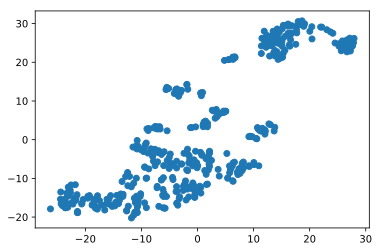

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [15]:
labels_train = kmeans.fit_predict(X_train_scaled)
labels_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [16]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

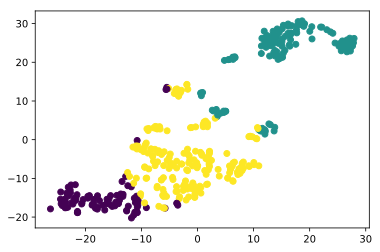

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [18]:
# странное разбиение, как будто бы лишние точки попали в центральный кластер :)

In [21]:
y_train.mean()

22.796534653465343

In [24]:
y_train[labels_train==0].mean(), y_train[labels_train==1].mean(), y_train[labels_train==2].mean()

(27.78837209302326, 16.165354330708663, 24.958115183246072)

In [26]:
X_train['CRIM'].mean()

3.609124628712873

In [30]:
X_train['CRIM'][labels_train==0].mean(), X_train['CRIM'][labels_train==1].mean(), X_train['CRIM'][labels_train==2].mean()

(0.07356558139534886, 10.797028425196853, 0.42166020942408367)

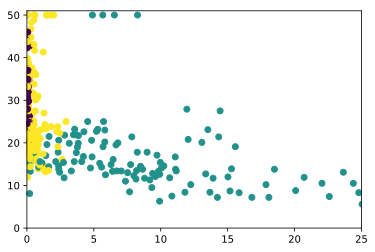

In [36]:
## похоже, что основным критерием кластеризации стал параметр CRIM
plt.axis([0, 25, 0, 51])
plt.scatter(X_train['CRIM'], y_train, c=labels_train)

#### Задание 3

In [38]:
labels_test = kmeans.predict(X_test_scaled)

In [39]:
pd.value_counts(labels_test)

2    51
1    35
0    16
dtype: int64

In [40]:
y_test.mean()

21.488235294117644

In [41]:
y_test[labels_test==0].mean(), y_test[labels_test==1].mean(), y_test[labels_test==2].mean()

(31.35, 16.43714285714286, 21.860784313725492)

In [26]:
X_test['CRIM'].mean()

3.609124628712873

In [42]:
X_test['CRIM'][labels_test==0].mean(), X_test['CRIM'][labels_test==1].mean(), X_test['CRIM'][labels_test==2].mean()

(0.062060000000000004, 10.165531142857143, 0.26607882352941176)

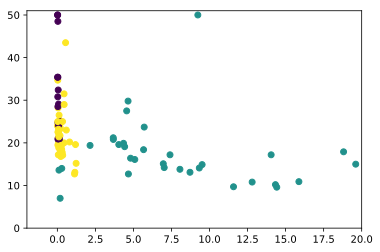

In [44]:
plt.axis([-2, 20, 0, 51])
plt.scatter(X_test['CRIM'], y_test, c=labels_test)